<a href="https://colab.research.google.com/github/hhk54250/20MA573-HHK/blob/master/hw8/CFD%20on%20a%20boundary%20value%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.linalg as li
def uh(
    h,
    b, 
    c,
    n):
    r=1/(h**2)+b/(2*h)
    s=2/(h**2)+c
    t=1/(h**2)-b/(2*h)
    Lh=np.zeros([n+1,n+1])
    Rhf=np.zeros([n+1,1])
    for i in range(n-1):
      Rhf[i+1,0]=2*(h*(i+1))*(h*(i+1))-3
    for i in range(n-1):
      Lh[i+1,i]=-r
      Lh[i+1,i+1]=s
      Lh[i+1,i+2]=-t
    Lh[0,0]=1
    Lh[n,n]=1
    sol=li.solve(Lh, Rhf)
    return sol         
uh(1/4,1,2,4)


array([[ 1.48029737e-16],
       [-1.87500000e-01],
       [-2.50000000e-01],
       [-1.87500000e-01],
       [ 0.00000000e+00]])

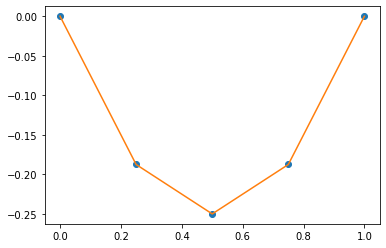

In [2]:
import matplotlib.pyplot as plt
x=np.linspace(0,1,5)
plt.plot(x, uh(1/4,1,2,4),'o');
y=x*x-x
plt.plot(x, y);

In [3]:
import math
error=[]
error1=[]
for i in range(5):
  error.append(abs((i/4)*(i/4)-(i/4)-uh(1/4,1,2,4)[i,0]))
print(np.max(error))
error1.append(math.log(np.max(error)))  

1.4802973661668753e-16


In [4]:
error=[]
for i in range(9):
  error.append(abs((i/8)*(i/8)-(i/8)-uh(1/8,1,2,8)[i,0]))
print(np.max(error))  
error1.append(math.log(np.max(error)))  

2.873518416676876e-16


In [5]:
error=[]
for i in range(17):
  error.append(abs((i/16)*(i/16)-(i/16)-uh(1/16,1,2,16)[i,0]))
print(np.max(error))  
error1.append(math.log(np.max(error)))  

1.4130111222501992e-15


In [6]:
error=[]
for i in range(33):
  error.append(abs((i/32)*(i/32)-(i/32)-uh(1/32,1,2,32)[i,0]))
print(np.max(error))  
error1.append(math.log(np.max(error)))  

2.377585308120335e-15


In [7]:
error=[]
for i in range(65):
  error.append(abs((i/64)*(i/64)-(i/64)-uh(1/64,1,2,64)[i,0]))
print(np.max(error)) 
error1.append(math.log(np.max(error)))  

2.7755575615628914e-17


In [9]:
error1

[-36.44911849722532,
 -35.78582427981505,
 -34.19305341986617,
 -33.67269099867838,
 -38.123094930796995]

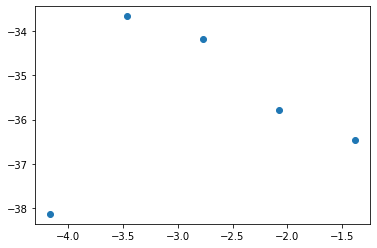

In [12]:
h=[]
for i in range(5):
  h.append(math.log(2**(-i-2)))
plt.plot(h, error1,'o')

In [13]:
import scipy.stats as ss
out = ss.linregress(h,error1)
print('the convergence order is ' + str(-out[0]))

the convergence order is -0.17814680931243876
